__Fitting__

In this example, we'll fit the imaging data we simulated in the previous exercise. We'll do this using model images generated via a tracer, and by comparing to the simulated image we'll get diagostics about the quality of the fit.

In [19]:
%matplotlib inline

import autolens as al
import autolens.plot as aplt

First you need to change the path below to the chapter 1 directory so we can load the data we output previously.

In [20]:
chapter_path = (
    "./"
)

The data path specifies where the data was output in the last tutorial, this time in the directory 'chapter_path/data'

In [34]:
dataset_path = chapter_path + "dataset/"

print(dataset_path)

imaging = al.imaging.from_fits(
    image_path=dataset_path + "image.fits",
    noise_map_path=dataset_path + "noise_map.fits",
    psf_path=dataset_path + "psf.fits",
    pixel_scales=0.1,
)

./dataset/


'imaging' is a ImagingData object, which is a 'package' of all components of the Imaging instrument of the lens, in particular:

1) The image.
2) The Point Spread Function (PSF).
3) Its noise-map.

In [22]:
print("Image:")
print(imaging.image)
print("Noise-Map:")
print(imaging.noise_map)
print("PSF:")
print(imaging.psf)

Image:
[-0.01811507  0.01601867  0.01352845 ... -0.02652015  0.00932933
  0.01188493]
Noise-Map:
[0.01652119 0.01966542 0.01945323 ... 0.01565033 0.01909008 0.01931191]
PSF:
[2.21033495e-12 1.98968011e-10 6.58891561e-09 8.02694246e-08
 3.59742603e-07 5.93115282e-07 3.59742603e-07 8.02694246e-08
 6.58891561e-09 1.98968011e-10 2.21033495e-12 1.98968011e-10
 1.79105296e-08 5.93115282e-07 7.22562334e-06 3.23829971e-05
 5.33905362e-05 3.23829971e-05 7.22562334e-06 5.93115282e-07
 1.79105296e-08 1.98968011e-10 6.58891561e-09 5.93115282e-07
 1.96412806e-05 2.39279782e-04 1.07237759e-03 1.76805174e-03
 1.07237759e-03 2.39279782e-04 1.96412806e-05 5.93115282e-07
 6.58891561e-09 8.02694246e-08 7.22562334e-06 2.39279782e-04
 2.91502450e-03 1.30642335e-02 2.15392796e-02 1.30642335e-02
 2.91502450e-03 2.39279782e-04 7.22562334e-06 8.02694246e-08
 3.59742603e-07 3.23829971e-05 1.07237759e-03 1.30642335e-02
 5.85498323e-02 9.65323539e-02 5.85498323e-02 1.30642335e-02
 1.07237759e-03 3.23829971e-05 3.

To fit an image, we first specify a mask. A mask describes the sections of the image that we fit.

Typically, we want to mask regions of the image where the lens and source galaxies are not visible, for example at the edges where the signal is entirely background sky and noise.

For the image we simulated, a 3" circular mask will do the job.

A mask also takes the 'sub_size' parameter we are used to giving a grid. This does what it does for a grid - defining the (masked) sub-grid used to calculate lensing quantities from a mask.

In [23]:
mask = al.mask.circular(
    shape_2d=imaging.shape_2d, pixel_scales=imaging.pixel_scales, sub_size=1, radius=3.0
)

print(mask)  # 1 = True, which means the pixel is masked. Edge pixels are indeed masked.
print(mask[48:53, 48:53])  # Whereas central pixels are False and therefore unmasked.

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
[[False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]]


We can use a imaging_plotter to compare the mask and the image - this is useful if we really want to 'tailor' a mask to the lensed source's light (which in this example, we won't).

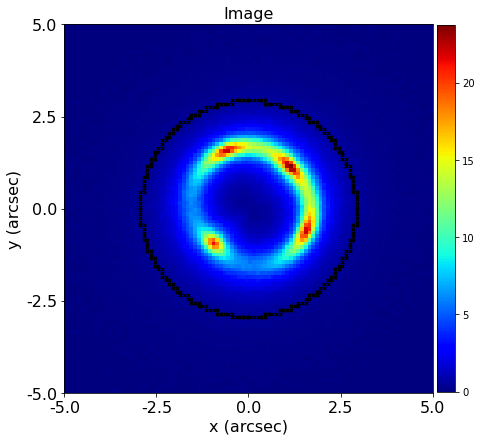

In [24]:
aplt.imaging.image(imaging=imaging, mask=mask)

We also use the mask to 'zoom' our plot around the masked region only - meaning that if our image is very large, we focus-in on the lens and source galaxies.

The mask also remove all pixels outside the mask in the plot, meaning bright pixels outside the mask won't impact the plot's color range.

You'll see this is an option for pretty much every plotter in PyAutoLens, and is something we'll do often throughout the tutorials.

A masked data object is a 'package' of all parts of a data-set we need in order to fit it with a lens model:

1) The imaging-data, including the image, PSF (so that when we compare a tracer's image to the image instrument we can include blurring due to the telescope optics) and noise-map (so our goodness-of-fit measure accounts for noise in the observations).

2) The mask, so that only the regions of the image with a signal are fitted.

3) A grid aligned to the imaging data's pixels, so the tracer's image is generated on the same (masked) grid as the image.

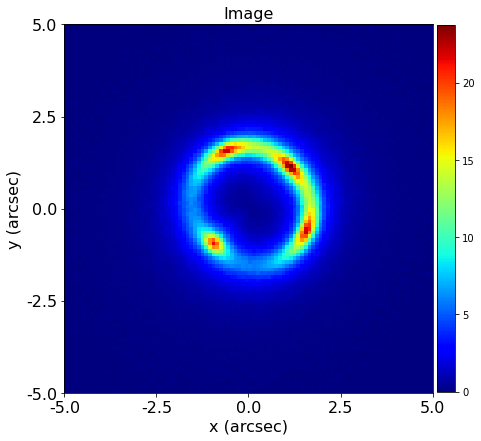

In [25]:
masked_imaging = al.masked.imaging(imaging=imaging, mask=mask)

aplt.imaging.image(imaging=masked_imaging.imaging)

By printing its attribute, we can see that it does indeed contain the mask, masked image, masked noise-map, psf and so on.

In [26]:
print("Mask")
print(masked_imaging.mask)
print()
print("Masked Image:")
print(masked_imaging.image)
print()
print("Masked Noise-Map:")
print(masked_imaging.noise_map)
print()
print("PSF:")
print(masked_imaging.psf)
print()

Mask
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]

Masked Image:
[0.5973197  0.5468935  0.56465807 ... 0.47047235 0.4448639  0.49173553]

Masked Noise-Map:
[0.04821202 0.0464361  0.04706938 ... 0.04360705 0.04261705 0.04441229]

PSF:
[2.21033495e-12 1.98968011e-10 6.58891561e-09 8.02694246e-08
 3.59742603e-07 5.93115282e-07 3.59742603e-07 8.02694246e-08
 6.58891561e-09 1.98968011e-10 2.21033495e-12 1.98968011e-10
 1.79105296e-08 5.93115282e-07 7.22562334e-06 3.23829971e-05
 5.33905362e-05 3.23829971e-05 7.22562334e-06 5.93115282e-07
 1.79105296e-08 1.98968011e-10 6.58891561e-09 5.93115282e-07
 1.96412806e-05 2.39279782e-04 1.07237759e-03 1.76805174e-03
 1.07237759e-03 2.39279782e-04 1.96412806e-05 5.93115282e-07
 6.58891561e-09 8.02694246e-08 7.22562334e-06 2.39279782e-0

The masked image and noise-map are again stored in 2D and 1D. 

However, the 1D array now corresponds only to the pixels that were not masked, whereas for the 2D array, all edge values are masked and are therefore zeros.

In [27]:
print("The 2D Masked Image and 1D Image of unmasked entries")
print(masked_imaging.image.shape_2d)
print(masked_imaging.image.shape_1d)
print(masked_imaging.image.in_2d)
print(masked_imaging.image.in_1d)
print()
print("The 2D Masked Noise-Map and 1D Noise-Map of unmasked entries")
print(masked_imaging.noise_map.shape_2d)
print(masked_imaging.noise_map.shape_1d)
print(masked_imaging.noise_map.in_2d)
print(masked_imaging.noise_map.in_1d)

The 2D Masked Image and 1D Image of unmasked entries
(100, 100)
2828
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0.5973197  0.5468935  0.56465807 ... 0.47047235 0.4448639  0.49173553]

The 2D Masked Noise-Map and 1D Noise-Map of unmasked entries
(100, 100)
2828
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0.04821202 0.0464361  0.04706938 ... 0.04360705 0.04261705 0.04441229]


The masked data also has a grid, where only coordinates which are not masked are included (the masked 2D values are set to [0.0. 0.0]).

In [28]:
print("Masked Grid")
print(masked_imaging.grid.in_2d)
print(masked_imaging.grid.in_1d)

Masked Grid
[[[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 ...

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]]
[[ 2.95 -0.45]
 [ 2.95 -0.35]
 [ 2.95 -0.25]
 ...
 [-2.95  0.25]
 [-2.95  0.35]
 [-2.95  0.45]]


To fit an image, create an image using a tracer. Lets use the same tracer we simulated the imaging instrument with (thus, our fit is 'perfect').

Its worth noting that below, we use the masked imaging's grid to setup the tracer. This ensures that our image-plane image is the same resolution and alignment as our lens data's masked image.

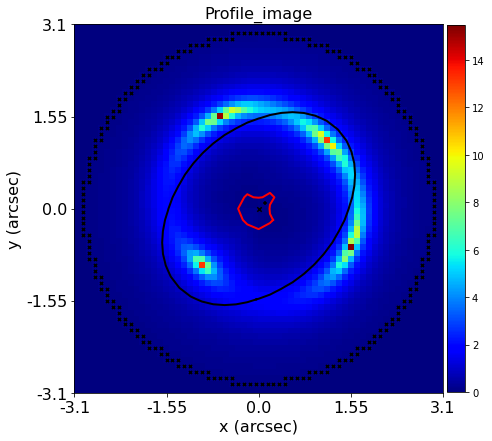

In [29]:
lens_galaxy = al.Galaxy(
    redshift=0.5,
    mass=al.mp.EllipticalIsothermal(
        centre=(0.0, 0.0), einstein_radius=1.6, axis_ratio=0.7, phi=45.0
    ),
)

source_galaxy = al.Galaxy(
    redshift=1.0,
    light=al.lp.EllipticalSersic(
        centre=(0.1, 0.1),
        axis_ratio=0.8,
        phi=60.0,
        intensity=0.3,
        effective_radius=1.0,
        sersic_index=2.5,
    ),
)

tracer = al.Tracer.from_galaxies(galaxies=[lens_galaxy, source_galaxy])

aplt.tracer.profile_image(tracer=tracer, grid=masked_imaging.grid)

To fit the image, we pass the lens data and tracer to the 'lens_fit' module. This performs the following:

1) Blurs the tracer's image with the lens data's PSF, ensuring the telescope optics are included in the fit. This creates the fit's 'model_image'.

2) Computes the difference between this model_image and the observed image-data, creating the fit's 'residual_map'.

3) Divides the residual-map by the noise-map and squares each value, creating the fit's 'chi_squared_map'.

4) Sums up these chi-squared values and converts them to a 'likelihood', which quantifies how good the tracer's fit to the data was (higher likelihood = better fit).

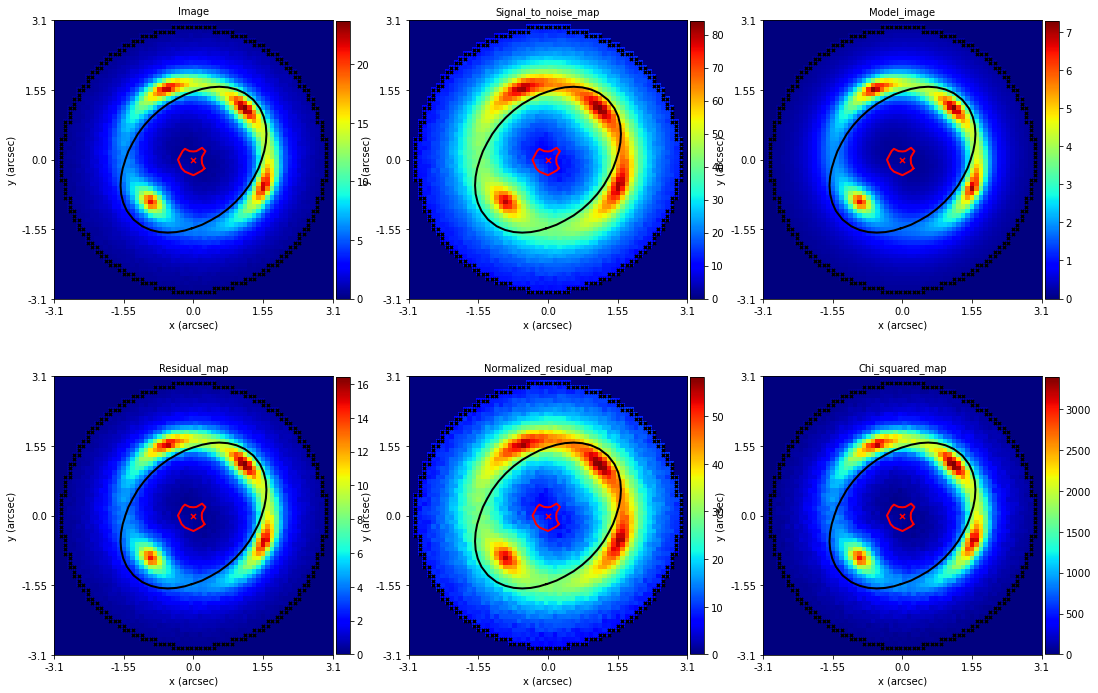

In [36]:
fit = al.fit(masked_dataset=masked_imaging, tracer=tracer)

aplt.fit_imaging.subplot_fit_imaging(
    fit=fit, 
    include=aplt.Include(mask=True), 
)

We can print the fit's attributes. As usual, we can choose whether to return the fits in 2d or 1d, and in 2d if we don't specify where we'll get all zeros, as the edges were masked:

In [31]:
print("Model-Image:")
print(fit.model_image.in_2d)
print(fit.model_image.in_1d)
print()
print("Residual Maps:")
print(fit.residual_map.in_2d)
print(fit.residual_map.in_1d)
print()
print("Chi-Squareds Maps:")
print(fit.chi_squared_map.in_2d)
print(fit.chi_squared_map.in_1d)

Model-Image:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0.18687564 0.19362645 0.19939513 ... 0.15443915 0.15219279 0.1491466 ]

Residual Maps:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0.41044407 0.35326705 0.36526295 ... 0.3160332  0.29267111 0.34258894]

Chi-Squareds Maps:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[72.47651188 57.87549609 60.21909202 ... 52.52330917 47.16207704
 59.50319398]


Of course, the central unmasked pixels have non-zero values.

In [32]:
model_image = fit.model_image.in_2d
print(model_image[48:53, 48:53])
print()

residual_map = fit.residual_map.in_2d
print("Residuals Central Pixels:")
print(residual_map[48:53, 48:53])
print()

print("Chi-Squareds Central Pixels:")
chi_squared_map = fit.chi_squared_map.in_2d
print(chi_squared_map[48:53, 48:53])

[[0.13794091 0.14184462 0.15872824 0.17578622 0.18937143]
 [0.15076388 0.14471844 0.14318529 0.14579615 0.155117  ]
 [0.19616924 0.17346949 0.14392813 0.12925937 0.13548306]
 [0.25486933 0.21065487 0.16073471 0.13461695 0.13601101]
 [0.30627448 0.24362318 0.1866397  0.15656165 0.15284435]]

Residuals Central Pixels:
[[0.32149445 0.29787675 0.2822617  0.43215481 0.48258511]
 [0.37942078 0.35025514 0.34385686 0.27852712 0.42667685]
 [0.48324513 0.36537846 0.34771212 0.27712866 0.36153999]
 [0.58711096 0.50209284 0.37944994 0.27481841 0.37691046]
 [0.72781023 0.55615984 0.3662038  0.250298   0.24877509]]

Chi-Squareds Central Pixels:
[[ 55.42660771  49.32020355  44.1810441   79.14124496  90.50576487]
 [ 68.53235424  61.85753536  60.42370663  44.38713209  80.10623723]
 [ 89.88512351  62.69163954  61.30603132  45.49888032  65.68146735]
 [109.77913885  93.05368022  67.47221667  44.47580533  69.53329393]
 [140.12385283 103.12945238  61.62513145  37.08073139  37.01354549]]


The fit also gives a likelihood, which is a single-figure estimate of how good the model image fitted the simulated image (in unmasked pixels only!).

In [33]:
print("Likelihood:")
print(fit.likelihood)

Likelihood:
-703741.2157855281


We used the same tracer to create and fit the image, giving an excellent fit. The residual-map and chi-squared-map, show no signs of the source galaxy's light present, indicating a good fit. This solution will translate to one of the highest-likelihood solutions possible.

Lets change the tracer, so that it's near the correct solution, but slightly off. Below, we slightly offset the lens galaxy, by 0.005"

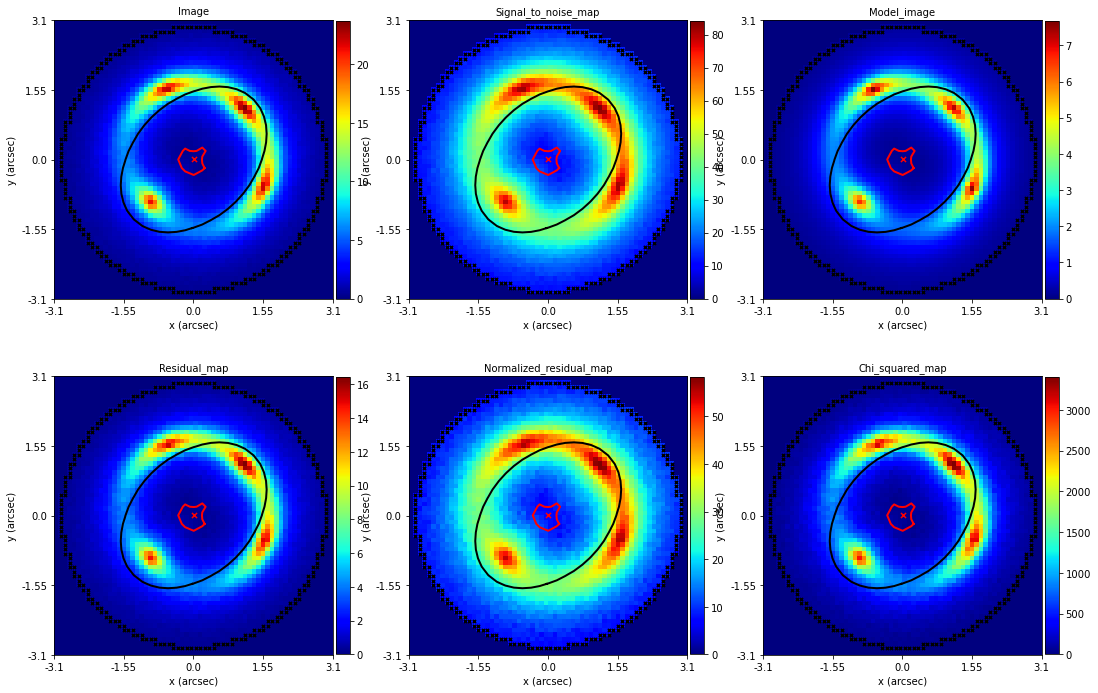

In [17]:
lens_galaxy = al.Galaxy(
    redshift=0.5,
    mass=al.mp.EllipticalIsothermal(
        centre=(0.005, 0.005), einstein_radius=1.6, axis_ratio=0.7, phi=45.0
    ),
)

source_galaxy = al.Galaxy(
    redshift=1.0,
    light=al.lp.EllipticalSersic(
        centre=(0.1, 0.1),
        axis_ratio=0.8,
        phi=60.0,
        intensity=0.3,
        effective_radius=1.0,
        sersic_index=2.5,
    ),
)

tracer = al.Tracer.from_galaxies(galaxies=[lens_galaxy, source_galaxy])

fit = al.fit(masked_dataset=masked_imaging, tracer=tracer)

aplt.fit_imaging.subplot_fit_imaging(
    fit=fit, 
    include=aplt.Include(mask=True),
)

Residuals now appear at the locations of the source galaxy, increasing the chi-squared values (which determine our likelihood).

Lets compare the likelihood to the value we computed above (which was 4372.90):

In [18]:
print("Previous Likelihood:")
print(4372.90)
print("New Likelihood:")
print(fit.likelihood)

Previous Likelihood:
4372.9
New Likelihood:
-701861.4179969657


It decreases! As expected, this model us a worse fit to the data.

Lets change the tracer, one more time, to a solution nowhere near the correct one.

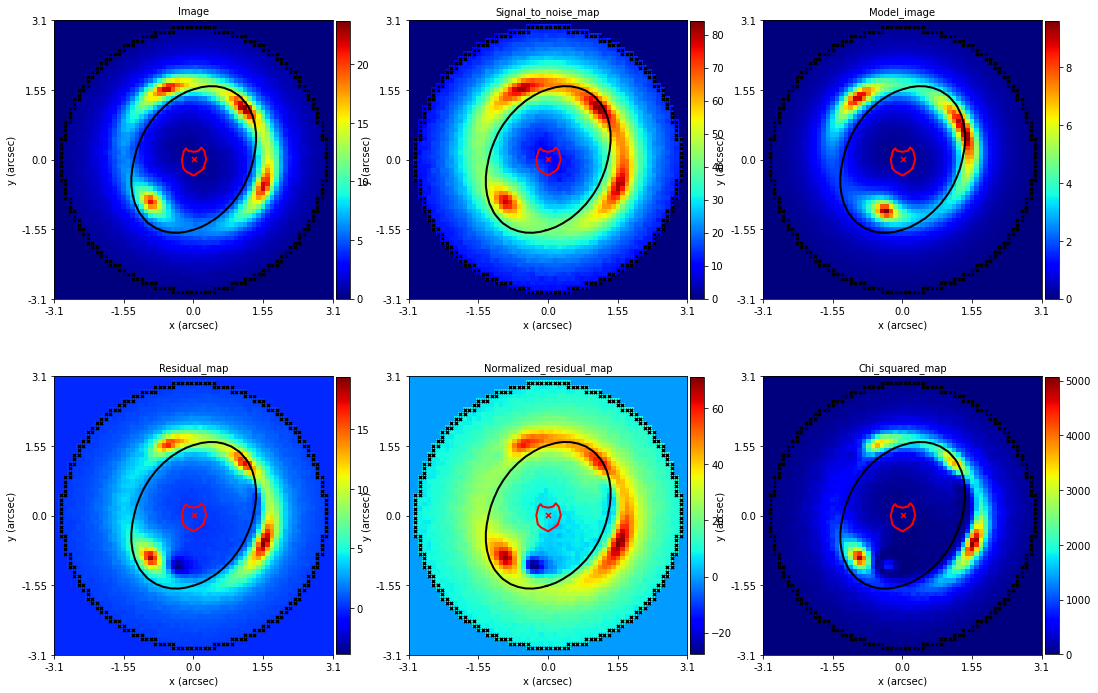

In [37]:
lens_galaxy = al.Galaxy(
    redshift=0.5,
    mass=al.mp.EllipticalIsothermal(
        centre=(0.005, 0.005), einstein_radius=1.5, axis_ratio=0.72, phi=60.0
    ),
)

source_galaxy = al.Galaxy(
    redshift=1.0,
    light=al.lp.EllipticalSersic(
        centre=(0.2, 0.0),
        axis_ratio=0.8,
        phi=60.0,
        intensity=0.5,
        effective_radius=0.8,
        sersic_index=2.5,
    ),
)

tracer = al.Tracer.from_galaxies(galaxies=[lens_galaxy, source_galaxy])

fit = al.fit(masked_dataset=masked_imaging, tracer=tracer)

aplt.fit_imaging.subplot_fit_imaging(
    fit=fit, 
    include=aplt.Include(mask=True), 
)

Clearly, the model provides a terrible fit and this tracer is not a plausible representation of the image-data (of course, we already knew that, given that we simulated it!)

The likelihood drops dramatically, as expected.

In [38]:
print("Previous Likelihoods:")
print(4372.90)
print(4205.47)
print("New Likelihood:")
print(fit.likelihood)

Previous Likelihoods:
4372.9
4205.47
New Likelihood:
-659357.9496099902


Congratulations, you've fitted your first strong lens with PyAutoLens! Perform the following exercises:

1) In this example, we 'knew' the correct solution, because we simulated the lens ourselves. In the real Universe, we have no idea what the correct solution is. How would you go about finding the correct solution? Could you find a solution that fits the data reasonable through trial and error?


In [ ]:
#不具合。
#なぜか、likelihoodがマイナスのオーダーで出る。さらに、値が小さいほど精度が良いと判断される様子。